In [1]:
from src.Planners.H_MCTS_HW import H_MCTS_HW
from src.Planners.H_MCTS_level2.H_MCTS import H_MCTS


import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l1_rows = 8
l1_cols = 8
l1_width = 2
l1_height = 2
# H_level = 2
num_barrier = 15
random_seed= 25

explorationConstant = 1 / math.sqrt(2)
grid_setting = (l1_rows, l1_cols, l1_width, l1_height)

iter_Limit = 10000
H_level = 2

In [3]:
r = 0
dead_list = [3, 19, 22, 29, 37, 43, 50, 54, 59, 62, 79, 110]  # unfeasible set

num_set = 5

success_data = dict()
iteration_data = dict()

modules = ['Level3', 'Level2']

for module in modules:
    success_data[module] = []
    iteration_data[module] = []

Success_H = 0
Success_Plain = 0

L3 = 3
L2 = 2
for i in range(1):
    for random_seed in range(0, 20):
    # for random_seed in range(6, 7):

        if random_seed in dead_list:
            continue
        else:
            print(f'random seed is {random_seed}')
            H_mcts_3 = H_MCTS_HW(grid_setting, iter_Limit=iter_Limit, H_level=L3, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
            H_mcts_2 = H_MCTS(grid_setting, iter_Limit=iter_Limit, H_level=L2, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
            
            L3_traj, L3_success, L3_iter = H_mcts_3.search()
            L2_traj, L2_success, L2_iter = H_mcts_2.search()
            
            print(f'Level3: {L3_iter}, Level2: {L2_iter}')
            
            success_data['Level3'].append(L3_success)
            success_data['Level2'].append(L2_success)

            iteration_data['Level3'].append(L3_iter)
            iteration_data['Level2'].append(L2_iter)

random seed is 0
Level3: 57, Level2: 54
random seed is 1


KeyError: 2

In [4]:
df_success = pd.DataFrame(success_data)

df_success_rate = pd.DataFrame({
    'without Extendable': [df_success['H_woE'].mean()],
    'with Extendable': [df_success['H'].mean()]
}, index=['H-MCTS'])

print(df_success_rate)

        without Extendable  with Extendable
H-MCTS                0.99            0.994


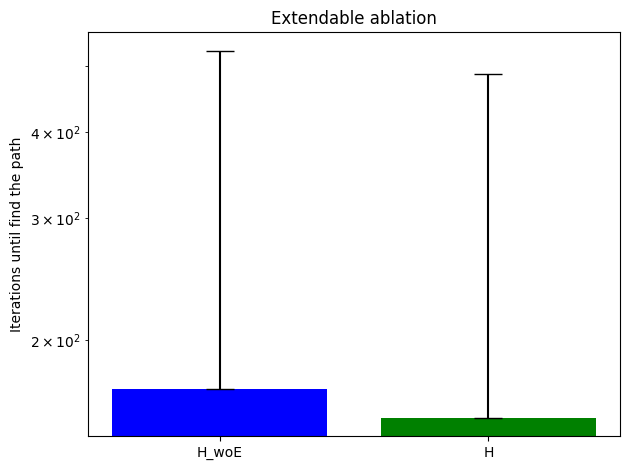

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the iteration_data based on success
filtered_iteration_data = {module: [] for module in modules}

for i in range(len(success_data['H_woE'])):
    if all([success_data[module][i] for module in modules]):
        for module in modules:
            filtered_iteration_data[module].append(iteration_data[module][i])

# Calculate mean and standard deviation
mean_data = {module: np.mean(filtered_iteration_data[module]) for module in modules}
std_data = {module: np.std(filtered_iteration_data[module]) for module in modules}

# Plotting the mean and standard deviation
labels = list(mean_data.keys())
mean_vals = list(mean_data.values())
std_vals = list(std_data.values())

x = np.arange(len(labels))  # the label locations

colors = ['blue', 'green', 'red', 'purple']  # Define colors for each module

fig, ax = plt.subplots()
for i in range(len(labels)):
    # Only positive error bars
    ax.bar(x[i], mean_vals[i], yerr=[[0], [std_vals[i]]], color=colors[i], capsize=10)

ax.set_yscale('log') # Change y-axis to log scale

# Remaining part of the code
ax.set_ylabel('Iterations until find the path')
ax.set_title('Extendable ablation')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

